IMPORTING NECESSARY LIBRARYS 

In [88]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATA SET FOR 4 CITIES 

In [89]:
Los_Angeles=pd.read_csv('losangeles.csv')
Berline=pd.read_csv('Berline.csv')
unitedstates=pd.read_csv('unitedstates.csv')
mexico=pd.read_csv('mexico.csv')


Transformed the dataset by pivoting to have pollutants as columns, allowing for a clearer and more structured format

Data Inspection

In [90]:
#display the first new lines of mexico
Berline.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude
0,4582,Berlin Grunewald (3.5 m),no2,1.8,?g/m?,2023-02-01T01:00:00+00:00,2023-02-01T02:00:00+01:00,Europe/Berlin,52.473192,13.225144
1,4582,Berlin Grunewald (3.5 m),no2,1.9,?g/m?,2023-02-01T20:00:00+00:00,2023-02-01T21:00:00+01:00,Europe/Berlin,52.473192,13.225144
2,4582,Berlin Grunewald (3.5 m),no2,1.7,?g/m?,2023-02-01T21:00:00+00:00,2023-02-01T22:00:00+01:00,Europe/Berlin,52.473192,13.225144
3,4582,Berlin Grunewald (3.5 m),no2,1.8,?g/m?,2023-02-01T22:00:00+00:00,2023-02-01T23:00:00+01:00,Europe/Berlin,52.473192,13.225144
4,4582,Berlin Grunewald (3.5 m),no2,1.6,?g/m?,2023-02-01T23:00:00+00:00,2023-02-02T00:00:00+01:00,Europe/Berlin,52.473192,13.225144


In [91]:
Berline.info


<bound method DataFrame.info of       location_id             location_name parameter  value   unit  \
0            4582  Berlin Grunewald (3.5 m)       no2    1.8  ?g/m?   
1            4582  Berlin Grunewald (3.5 m)       no2    1.9  ?g/m?   
2            4582  Berlin Grunewald (3.5 m)       no2    1.7  ?g/m?   
3            4582  Berlin Grunewald (3.5 m)       no2    1.8  ?g/m?   
4            4582  Berlin Grunewald (3.5 m)       no2    1.6  ?g/m?   
...           ...                       ...       ...    ...    ...   
7595         4582  Berlin Grunewald (3.5 m)      pm25   17.0  ?g/m?   
7596         4582  Berlin Grunewald (3.5 m)      pm25   10.0  ?g/m?   
7597         4582  Berlin Grunewald (3.5 m)      pm25   11.0  ?g/m?   
7598         4582  Berlin Grunewald (3.5 m)      pm25   11.0  ?g/m?   
7599         4582  Berlin Grunewald (3.5 m)      pm25    6.9  ?g/m?   

                    datetimeUtc              datetimeLocal       timezone  \
0     2023-02-01T01:00:00+00:00  2023-

DATA CLEANING

Cheking for duplicate value for all cities 

In [92]:
Mex_dup=mexico.duplicated().sum()
LA_dup=Los_Angeles.duplicated().sum()
Ber_dup=Berline.duplicated().sum()
US_dup=unitedstates.duplicated().sum()

#printing the values
print(Mex_dup)
print(LA_dup)
print(LA_dup)
print(US_dup)


0
0
0
0


#Handeing missing values 

#MEXICO

In [93]:
# Check for missing values in each column and count them
mexico.isnull().sum()

location_id         0
location_name       0
parameter           0
value               0
unit                0
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      4449
isMobile         4449
isMonitor        4449
owner_name          0
provider            0
dtype: int64

In [94]:
#Define the columns to drop empty columns from the DataFrame
columns_to_drop=['country_iso','isMobile','isMonitor']
# Drop the specified columns from the DataFrame
mexico.drop(columns=columns_to_drop,inplace=True)
# Display the first few rows of the DataFrame to get a quick look at the data
mexico.head()  #output:the 3 columns arenot there

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,owner_name,provider
0,9507,Ceboruco,no2,0.010,ppm,2023-01-09T20:00:00+00:00,2023-01-09T14:00:00-06:00,America/Mexico_City,19.260306,-99.645722,Unknown Governmental Organization,Sinaica Mexico
1,9507,Ceboruco,no2,0.006,ppm,2023-01-09T21:00:00+00:00,2023-01-09T15:00:00-06:00,America/Mexico_City,19.260306,-99.645722,Unknown Governmental Organization,Sinaica Mexico
2,9507,Ceboruco,no2,0.012,ppm,2023-01-09T22:00:00+00:00,2023-01-09T16:00:00-06:00,America/Mexico_City,19.260306,-99.645722,Unknown Governmental Organization,Sinaica Mexico
3,9507,Ceboruco,no2,0.009,ppm,2023-01-09T23:00:00+00:00,2023-01-09T17:00:00-06:00,America/Mexico_City,19.260306,-99.645722,Unknown Governmental Organization,Sinaica Mexico
4,9507,Ceboruco,no2,0.017,ppm,2023-01-10T00:00:00+00:00,2023-01-09T18:00:00-06:00,America/Mexico_City,19.260306,-99.645722,Unknown Governmental Organization,Sinaica Mexico


#Example Los_Angeles

In [95]:
# Check for missing values in each column and count them
Los_Angeles.isnull().sum()


#Define the columns to drop empty columns from the DataFrame
columns_to_drop=['country_iso','isMobile','isMonitor']
# Drop the specified columns from the DataFrame
Los_Angeles.drop(columns=columns_to_drop,inplace=True)
# Display the first few rows of the DataFrame to get a quick look at the data
Los_Angeles.head()  #output:the 3 columns arenot there


# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
Los_Angeles= pd.pivot_table(Los_Angeles, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')
# Reset index to convert the multi-level index back into columns
Los_Angeles.reset_index(inplace=True)
# Reorder columns as desired
Los_Angeles = Los_Angeles[['location_name', 'datetimeUtc', 'o3', 'pm25','no2','unit']]
# Save the pivoted dataframe to a new CSV file
Los_Angeles.to_csv('losangeles_pivot_January2023-June2013.csv', index=False)
#rename the colomns with appropriate name
Los_Angeles.rename(columns={'pm25':'pm25','o3':'O3','no2':'No2'},inplace=True)
# Display the first few rows of the pivoted dataframe
Los_Angeles.head()

parameter,location_name,datetimeUtc,O3,pm25,No2,unit
0,Los Angeles - N. Mai,2023-01-01T01:00:00+00:00,NaN,1.6,NaN,?g/m?
1,Los Angeles - N. Mai,2023-01-01T01:00:00+00:00,0.011,NaN,0.010,ppm
2,Los Angeles - N. Mai,2023-01-01T02:00:00+00:00,NaN,1.6,NaN,?g/m?
3,Los Angeles - N. Mai,2023-01-01T02:00:00+00:00,0.011,NaN,0.011,ppm
4,Los Angeles - N. Mai,2023-01-01T03:00:00+00:00,NaN,2.9,NaN,?g/m?


#Berlin

In [ ]:
# Check for missing values in each column and count them
Berline.isnull().sum()
Berline.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude
0,4582,Berlin Grunewald (3.5 m),no2,1.8,?g/m?,2023-02-01T01:00:00+00:00,2023-02-01T02:00:00+01:00,Europe/Berlin,52.473192,13.225144
1,4582,Berlin Grunewald (3.5 m),no2,1.9,?g/m?,2023-02-01T20:00:00+00:00,2023-02-01T21:00:00+01:00,Europe/Berlin,52.473192,13.225144
2,4582,Berlin Grunewald (3.5 m),no2,1.7,?g/m?,2023-02-01T21:00:00+00:00,2023-02-01T22:00:00+01:00,Europe/Berlin,52.473192,13.225144
3,4582,Berlin Grunewald (3.5 m),no2,1.8,?g/m?,2023-02-01T22:00:00+00:00,2023-02-01T23:00:00+01:00,Europe/Berlin,52.473192,13.225144
4,4582,Berlin Grunewald (3.5 m),no2,1.6,?g/m?,2023-02-01T23:00:00+00:00,2023-02-02T00:00:00+01:00,Europe/Berlin,52.473192,13.225144


#UNITEDSTATES(WY/KC)

In [ ]:
# Check for missing values in each column and count them
unitedstates.isnull().sum()

location_id         0
location_name       0
parameter           0
value               0
unit                0
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      8490
isMobile         8490
isMonitor        8490
owner_name          0
provider            0
dtype: int64

In [ ]:
#Define the columns to drop empty columns from the DataFrame
columns_to_drop=['country_iso','isMobile','isMonitor']

# Drop the specified columns from the DataFrame
unitedstates.drop(columns=columns_to_drop,inplace=True)

# Display the first few rows of the DataFrame to get a quick look at the data
unitedstates.head()  #output:the 3 columns arenot there

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,owner_name,provider
0,1459,WY/KC,no2,0.035,ppm,2023-01-01T01:00:00+00:00,2022-12-31T19:00:00-06:00,America/Chicago,39.1175,-94.6356,Unknown Governmental Organization,AirNow
1,1459,WY/KC,no2,0.037,ppm,2023-01-01T02:00:00+00:00,2022-12-31T20:00:00-06:00,America/Chicago,39.1175,-94.6356,Unknown Governmental Organization,AirNow
2,1459,WY/KC,no2,0.037,ppm,2023-01-01T03:00:00+00:00,2022-12-31T21:00:00-06:00,America/Chicago,39.1175,-94.6356,Unknown Governmental Organization,AirNow
3,1459,WY/KC,no2,0.034,ppm,2023-01-01T04:00:00+00:00,2022-12-31T22:00:00-06:00,America/Chicago,39.1175,-94.6356,Unknown Governmental Organization,AirNow
4,1459,WY/KC,no2,0.023,ppm,2023-01-01T05:00:00+00:00,2022-12-31T23:00:00-06:00,America/Chicago,39.1175,-94.6356,Unknown Governmental Organization,AirNow


#Converting unit for O3 and No2 from ppm to Âµg/mÂ³

#Berlin

In [ ]:
# Molecular weights of the pollutants
molecular_weights = {
    'no2': 46.0055,  # Nitrogen Dioxide
    'o3': 48.00,  # Ozone
    # PM2.5 doesnot not need conversion
}
# Conversion from ppm to µg/m³
def ugm3_to_ppm(concentration, molecular_weight):
    return concentration * molecular_weight * 1000 / 24.45

# Convert ppm to µg/m³ where necessary
def convert_units(row):
    if row['unit'] == 'µg/m³' and row['parameter'] in molecular_weights:
        return ugm3_to_ppm(row['value'], molecular_weights[row['parameter']])
    return row['value']

# Apply the conversion
Los_Angeles['value'] = Los_Angeles.apply(convert_units, axis=1)

# Now all values should be in µg/m³
Los_Angeles['unit'] = 'ppm'
Los_Angeles.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,owner_name,provider
0,7936,Los Angeles - N. Mai,no2,0.0100,ppm,2023-01-01T01:00:00+00:00,2022-12-31T17:00:00-08:00,America/Los_Angeles,34.066429,-118.226755,Unknown Governmental Organization,AirNow
1,7936,Los Angeles - N. Mai,no2,0.0110,ppm,2023-01-01T02:00:00+00:00,2022-12-31T18:00:00-08:00,America/Los_Angeles,34.066429,-118.226755,Unknown Governmental Organization,AirNow
2,7936,Los Angeles - N. Mai,no2,0.0052,ppm,2023-01-01T03:00:00+00:00,2022-12-31T19:00:00-08:00,America/Los_Angeles,34.066429,-118.226755,Unknown Governmental Organization,AirNow
3,7936,Los Angeles - N. Mai,no2,0.0043,ppm,2023-01-01T04:00:00+00:00,2022-12-31T20:00:00-08:00,America/Los_Angeles,34.066429,-118.226755,Unknown Governmental Organization,AirNow
4,7936,Los Angeles - N. Mai,no2,0.0037,ppm,2023-01-01T05:00:00+00:00,2022-12-31T21:00:00-08:00,America/Los_Angeles,34.066429,-118.226755,Unknown Governmental Organization,AirNow


#Converting data typs for data analysis 

In [ ]:
#changing the datatype for datetimeUtc from object to datetime format
 
mexico['datetimeUtc'] = pd.to_datetime(mexico['datetimeUtc'])
Los_Angeles['datetimeUtc'] = pd.to_datetime(Los_Angeles['datetimeUtc'])
mexico['datetimeUtc'] = pd.to_datetime(mexico['datetimeUtc'])
Los_Angeles['datetimeUtc'] = pd.to_datetime(Los_Angeles['datetimeUtc'])


#Data manupulation
pivoting the data frame to have the polutants as column

#Los_Angeles

In [ ]:
# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
Los_Angeles= pd.pivot_table(Los_Angeles, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')

# Reset index to convert the multi-level index back into columns
Los_Angeles.reset_index(inplace=True)

# Reorder columns as desired
Los_Angeles = Los_Angeles[['location_name', 'datetimeUtc', 'o3', 'pm25','no2','unit']]

# Save the pivoted dataframe to a new CSV file
Los_Angeles.to_csv('losangeles_pivot_January2023-June2013.csv', index=False)

#rename the colomns with appropriate name
Los_Angeles.rename(columns={'pm25':'pm25','o3':'O3','no2':'No2'},inplace=True)

# Display the first few rows of the pivoted dataframe
Los_Angeles.head()

parameter,location_name,datetimeUtc,O3,pm25,No2,unit
0,Los Angeles - N. Mai,2023-01-01 01:00:00+00:00,0.011,1.6,0.0100,ppm
1,Los Angeles - N. Mai,2023-01-01 02:00:00+00:00,0.011,1.6,0.0110,ppm
2,Los Angeles - N. Mai,2023-01-01 03:00:00+00:00,0.016,2.9,0.0052,ppm
3,Los Angeles - N. Mai,2023-01-01 04:00:00+00:00,0.017,4.6,0.0043,ppm
4,Los Angeles - N. Mai,2023-01-01 05:00:00+00:00,0.018,3.6,0.0037,ppm


#mexico

In [ ]:
# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
mexico= pd.pivot_table(mexico, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')

# Reset index to convert the multi-level index back into columns
mexico.reset_index(inplace=True)

# Reorder columns as desired
mexico = mexico[['location_name', 'datetimeUtc', 'o3','pm25','no2','unit']]

# Save the pivoted dataframe to a new CSV file
mexico.to_csv('unitedstates_pivot_January2023-June2013.csv', index=False)

#rename the colomns with appropriate name
mexico.rename(columns={'pm25':'pm25','o3':'O3','no2':'No2'},inplace=True)

# Display the first few rows of the pivoted dataframe
mexico.head()
# Displaying a concise summary of the pivoted dataframe



parameter,location_name,datetimeUtc,O3,pm25,No2,unit
0,Ceboruco,2023-01-09 20:00:00+00:00,NaN,45.0,NaN,?g/m?
1,Ceboruco,2023-01-09 20:00:00+00:00,0.081,NaN,0.010,ppm
2,Ceboruco,2023-01-09 21:00:00+00:00,NaN,41.0,NaN,?g/m?
3,Ceboruco,2023-01-09 21:00:00+00:00,0.068,NaN,0.006,ppm
4,Ceboruco,2023-01-09 22:00:00+00:00,NaN,33.0,NaN,?g/m?


#cleaning the pivot table for cities

#Berline

In [ ]:
# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
Berline= pd.pivot_table(Berline, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')

# Reset index to convert the multi-level index back into columns
Berline.reset_index(inplace=True)

# Reorder columns as desired
berline =Berline[['location_name', 'datetimeUtc', 'o3','pm25','no2','unit']]

# Save the pivoted dataframe to a new CSV file
Berline.to_csv('unitedstates_pivot_January2023-June2013.csv', index=False)

#rename the colomns with appropriate name
Berline.rename(columns={'pm25':'pm25','o3':'O3','no2':'No2'},inplace=True)

# Display the first few rows of the pivoted dataframe
Berline.head()
# Displaying a concise summary of the pivoted dataframe

parameter,datetimeUtc,location_name,unit,No2,O3,pm25
0,2023-01-01T01:00:00+00:00,Berlin Grunewald (3.5 m),?g/m?,4.6,53.0,10.0
1,2023-01-02T00:00:00+00:00,Berlin Grunewald (3.5 m),?g/m?,12.0,30.0,9.2
2,2023-01-02T01:00:00+00:00,Berlin Grunewald (3.5 m),?g/m?,14.0,21.0,9.8
3,2023-01-03T00:00:00+00:00,Berlin Grunewald (3.5 m),?g/m?,1.6,61.0,4.2
4,2023-01-03T01:00:00+00:00,Berlin Grunewald (3.5 m),?g/m?,1.5,61.0,4.0


#Unitedstaes's city

In [ ]:
# Pivot the DataFrame with multi-level index including 'location_name' and 'unit'
unitedstates= pd.pivot_table(unitedstates, 
                                index=['datetimeUtc', 'location_name', 'unit'], 
                                columns='parameter', 
                                values='value', 
                                aggfunc='mean')

# Reset index to convert the multi-level index back into columns
unitedstates.reset_index(inplace=True)

# Reorder columns as desired
unitedstates = unitedstates[['location_name', 'datetimeUtc', 'o3','pm25','no2','unit']]

# Save the pivoted dataframe to a new CSV file
unitedstates.to_csv('unitedstates_pivot_January2023-June2013.csv', index=False)

#rename the colomns with appropriate name
unitedstates.rename(columns={'pm25':'pm25','o3':'O3','no2':'No2'},inplace=True)

# Display the first few rows of the pivoted dataframe
unitedstates.head()
# Displaying a concise summary of the pivoted dataframe

parameter,location_name,datetimeUtc,O3,pm25,No2,unit
0,WY/KC,2023-01-01T01:00:00+00:00,0.002,NaN,0.035,ppm
1,WY/KC,2023-01-01T02:00:00+00:00,0.002,NaN,0.037,ppm
2,WY/KC,2023-01-01T03:00:00+00:00,0.002,NaN,0.037,ppm
3,WY/KC,2023-01-01T04:00:00+00:00,0.003,NaN,0.034,ppm
4,WY/KC,2023-01-01T05:00:00+00:00,0.010,NaN,0.023,ppm


In [ ]:
# Concatenate all the cleaned dataframes
combined_AQI = pd.concat([mexico, Los_Angeles, unitedstates, Berline], axis=0)

# Reset index to ensure datetime is a column
combined_AQI.reset_index(inplace=True)

# Display info and first few rows of the combined data
print("Combined AQI Data:")
print(combined_AQI.info())
print(combined_AQI.head())


Combined AQI Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14134 entries, 0 to 14133
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          14134 non-null  int64  
 1   location_name  14134 non-null  object 
 2   datetimeUtc    14134 non-null  object 
 3   O3             9882 non-null   float64
 4   pm25           8838 non-null   float64
 5   No2            9911 non-null   float64
 6   unit           14134 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 773.1+ KB
None
parameter  index location_name                datetimeUtc     O3  pm25    No2  \
0              0      Ceboruco  2023-01-09 20:00:00+00:00    NaN  45.0    NaN   
1              1      Ceboruco  2023-01-09 20:00:00+00:00  0.081   NaN  0.010   
2              2      Ceboruco  2023-01-09 21:00:00+00:00    NaN  41.0    NaN   
3              3      Ceboruco  2023-01-09 21:00:00+00:00  0.068   NaN  0.006   
4  

In [ ]:
summary_stats = combined_AQI.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
parameter         index           O3         pm25          No2
count      14134.000000  9882.000000  8838.000000  9911.000000
mean        1966.563676    16.112255    14.472505     1.851189
std         1369.814955    30.845007    11.110283     4.332637
min            0.000000    -0.004000    -1.300000     0.000000
25%          883.000000     0.024000     7.000000     0.006400
50%         1766.000000     0.040000    11.000000     0.015000
75%         2686.000000     7.325000    18.000000     1.300000
max         5565.000000   140.000000   100.000000    46.000000


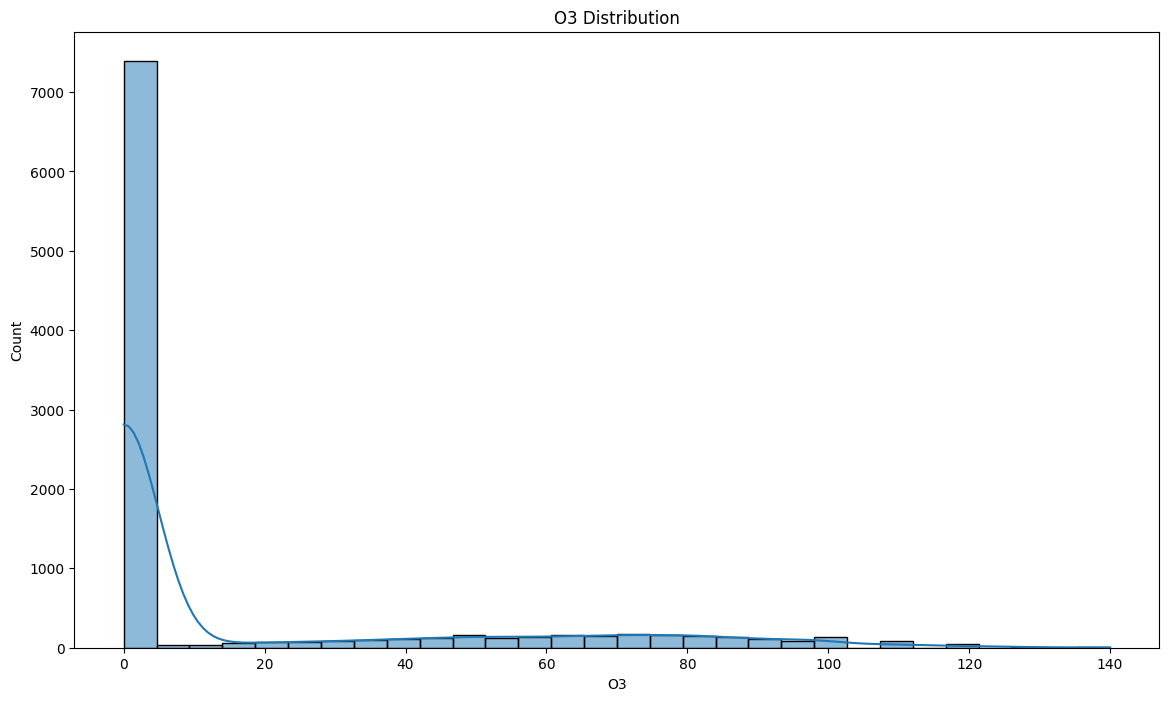

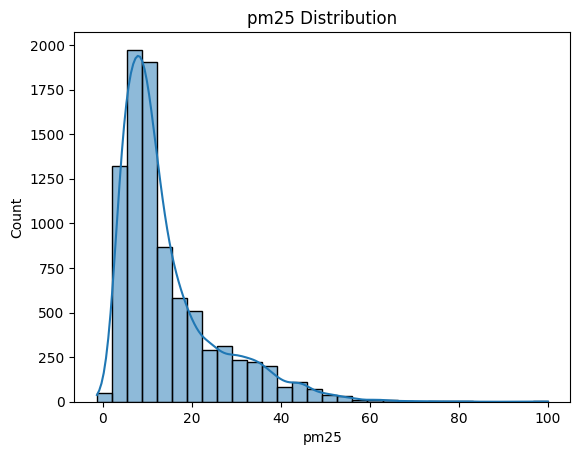

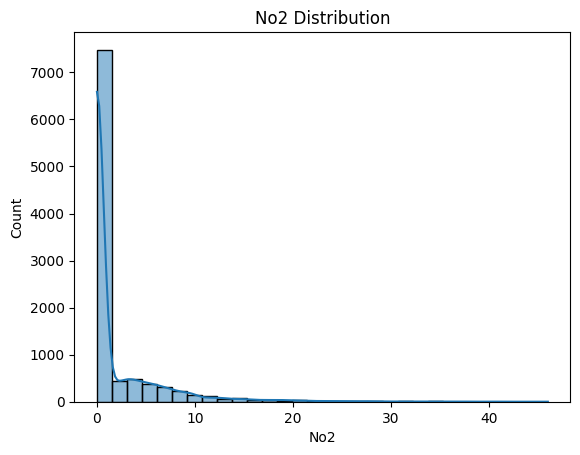

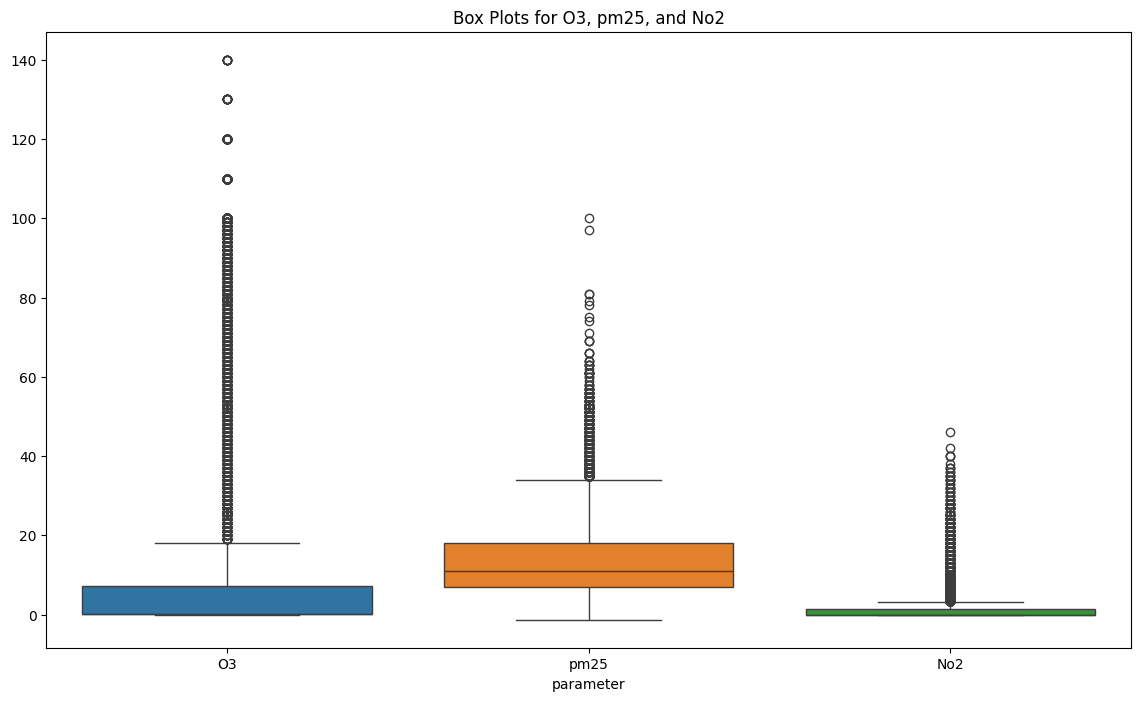

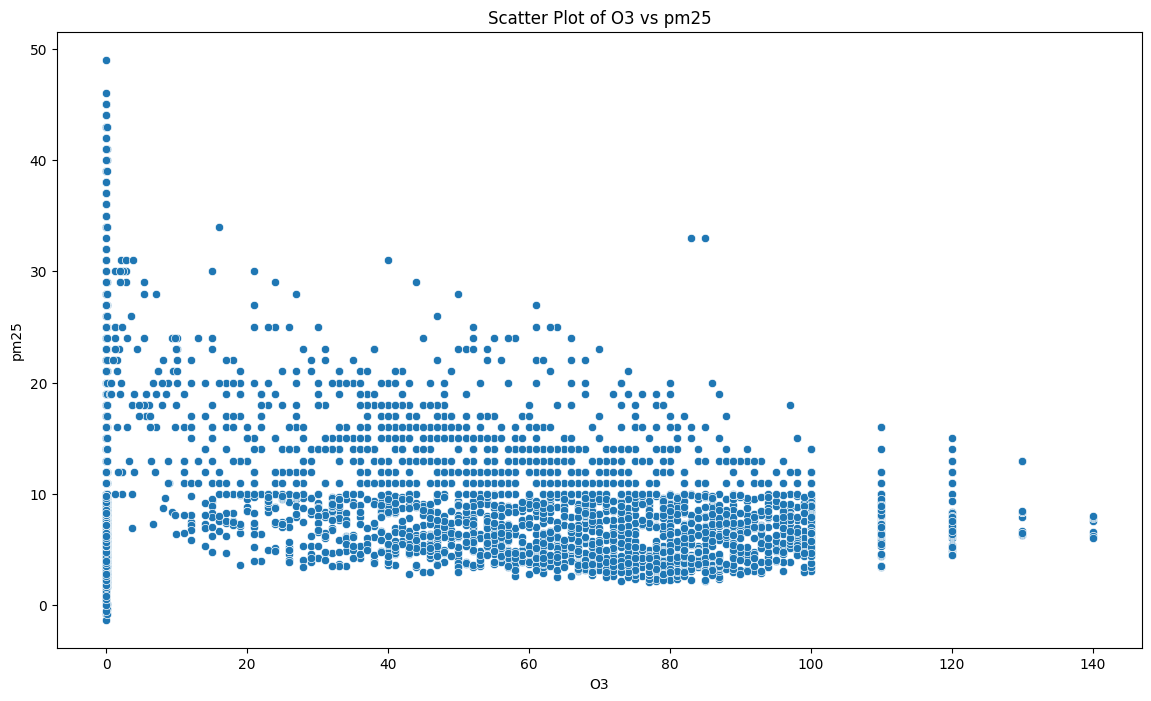

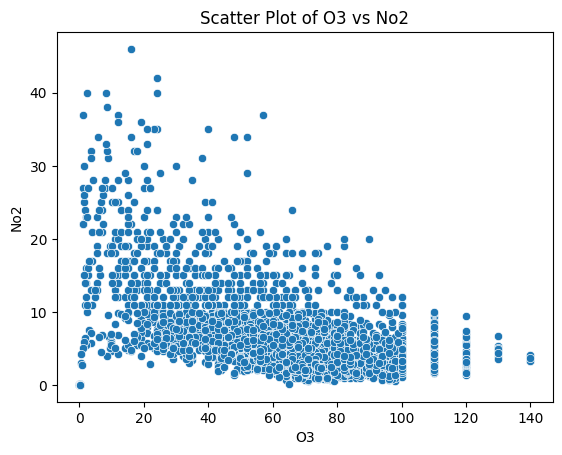

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt-

# Histograms
plt.figure(figsize=(14, 8))
sns.histplot(combined_AQI['O3'], kde=True, bins=30)
plt.title('O3 Distribution')
plt.show()

sns.histplot(combined_AQI['pm25'], kde=True, bins=30)
plt.title('pm25 Distribution')
plt.show()

sns.histplot(combined_AQI['No2'], kde=True, bins=30)
plt.title('No2 Distribution')
plt.show()

# Box Plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_AQI[['O3', 'pm25', 'No2']])
plt.title('Box Plots for O3, pm25, and No2')
plt.show()

# Scatter Plots
plt.figure(figsize=(14, 8))
sns.scatterplot(x='O3', y='pm25', data=combined_AQI)
plt.title('Scatter Plot of O3 vs pm25')
plt.show()

sns.scatterplot(x='O3', y='No2', data=combined_AQI)
plt.title('Scatter Plot of O3 vs No2')
plt.show()


Data Exploration and Analysis
SUMMRY STASTICS
- The mean values of O3, pm25, and No2 are 16.11, 14.47, and 1.85, respectively.
- The standard deviation indicates the variability of each pollutant.
- Minimum and maximum values help identify the range of the data.
- Percentiles (25%, 50%, 75%) show the distribution of data.

Visualizing the Data Distribution

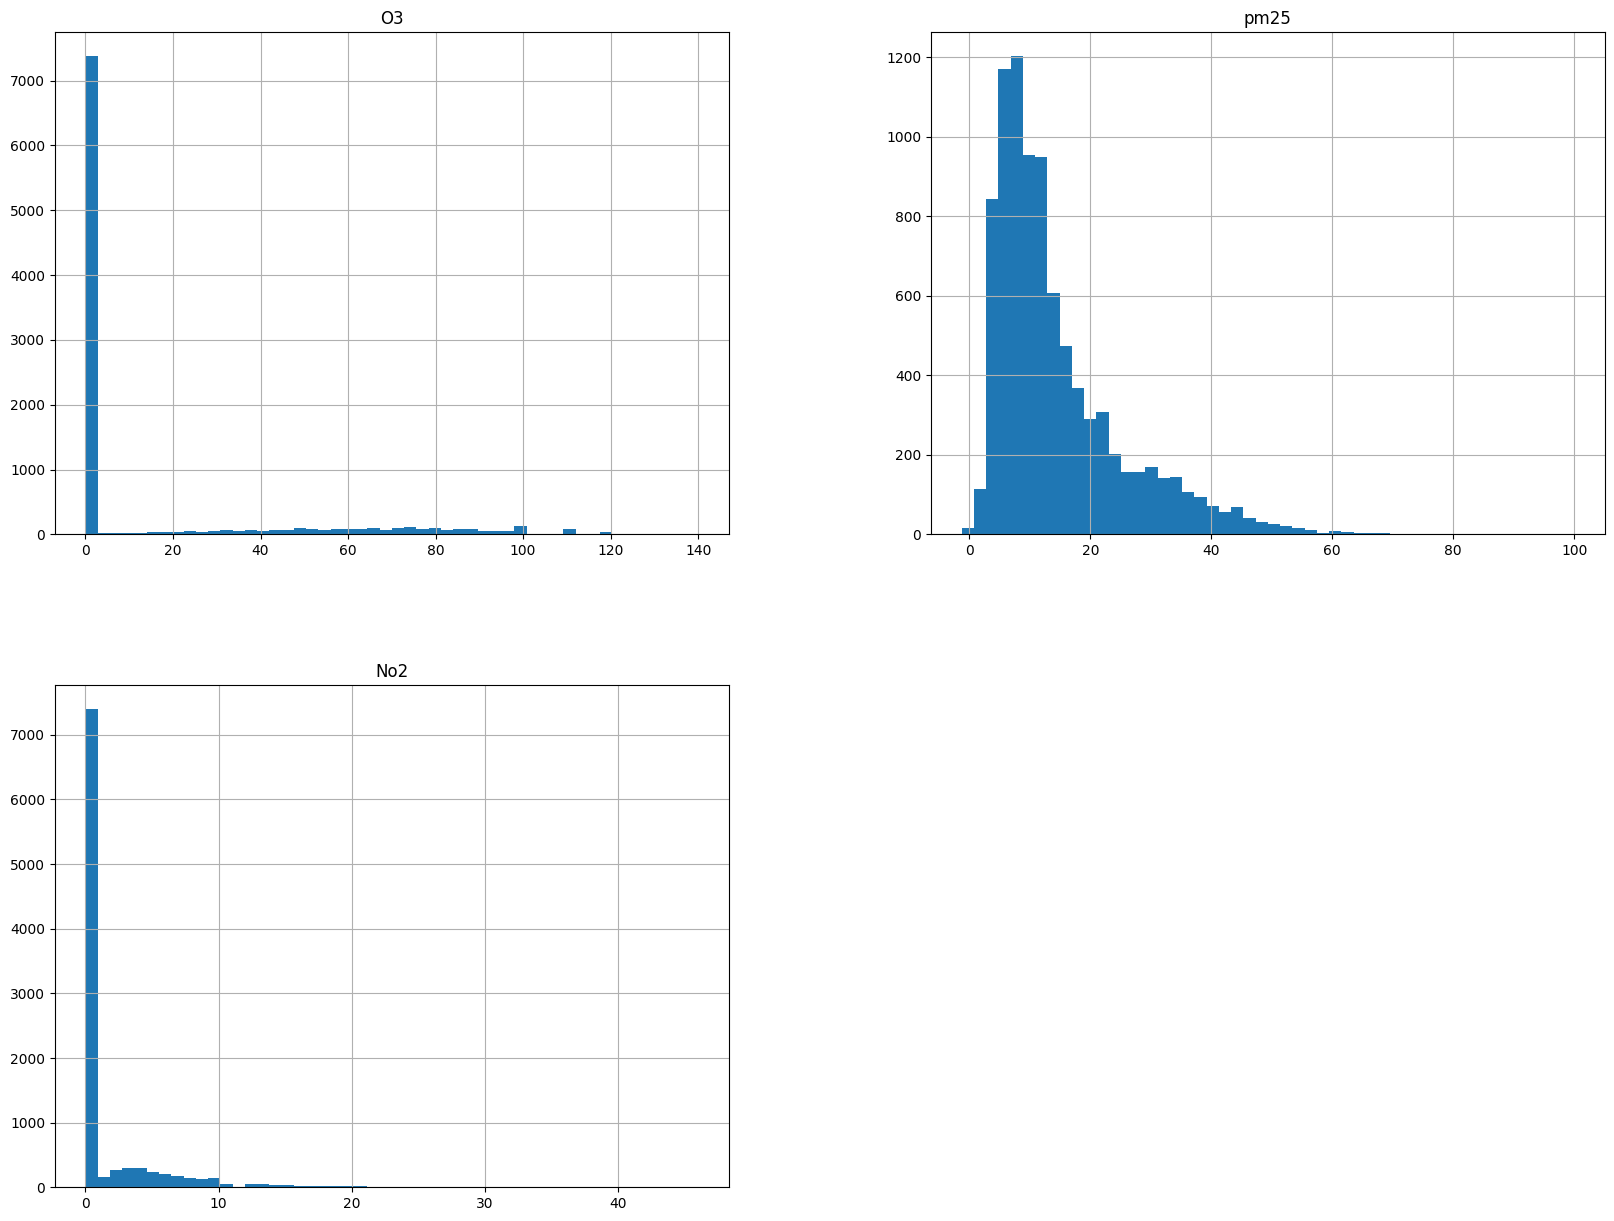

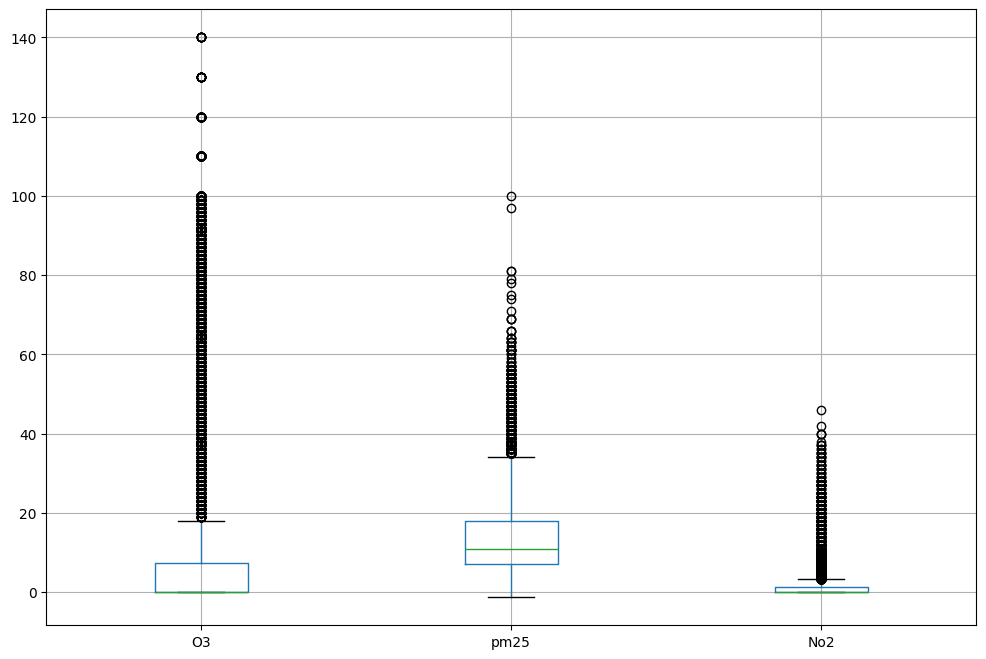

In [ ]:
import matplotlib.pyplot as plt

combined_AQI[['O3', 'pm25', 'No2']].hist(bins=50, figsize=(20, 15))
plt.show()

combined_AQI[['O3', 'pm25', 'No2']].boxplot(figsize=(12, 8))
plt.show()


Comparing AQI Data Across Different Cities

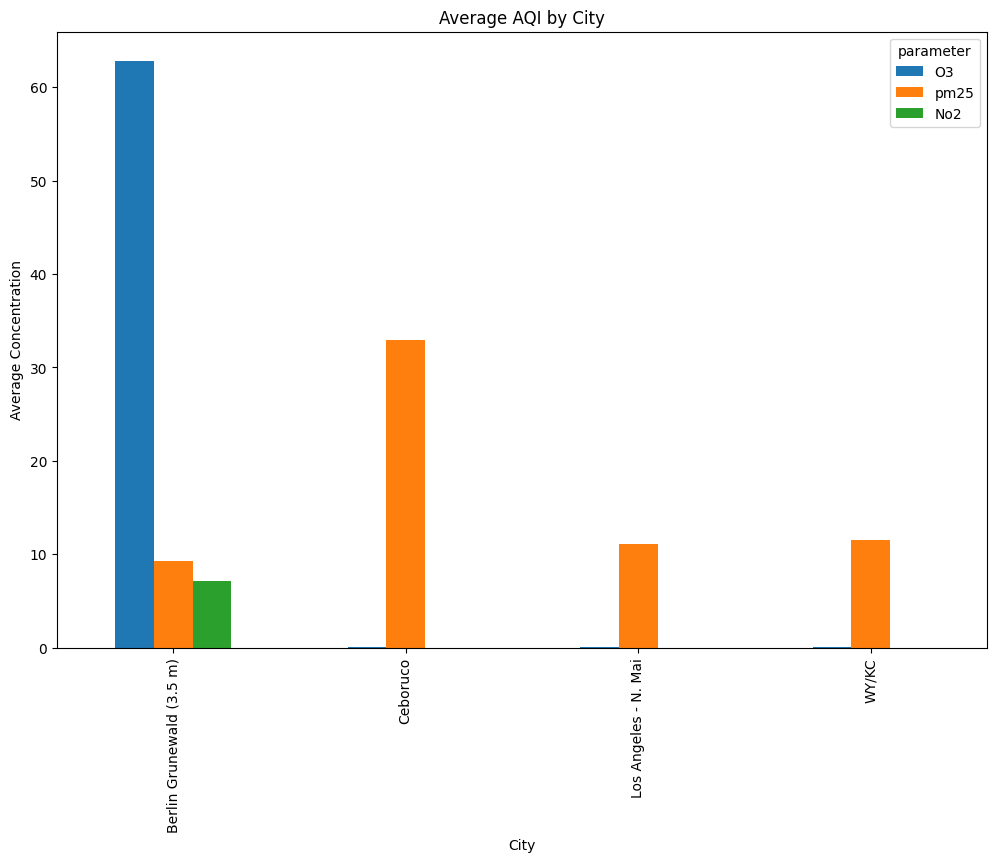

In [ ]:
city_avg_AQI = combined_AQI.groupby('location_name')[['O3', 'pm25', 'No2']].mean()
city_avg_AQI.plot(kind='bar', figsize=(12, 8))
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average Concentration')
plt.show()


 Visualization and Interpretation
 

Heatmaps:

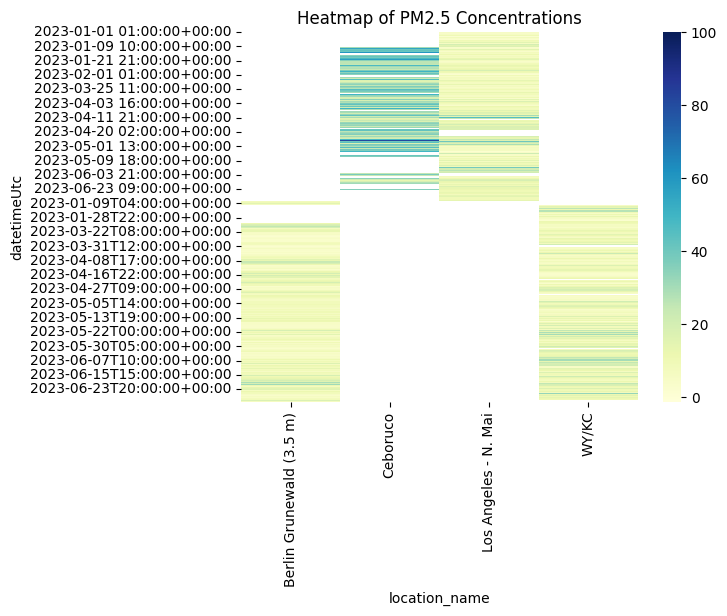

In [ ]:
pivot_pm25 = combined_AQI.pivot_table(values='pm25', index='datetimeUtc', columns='location_name', aggfunc='mean')
sns.heatmap(pivot_pm25, cmap="YlGnBu")
plt.title('Heatmap of PM2.5 Concentrations')
plt.show()
